<a href="https://colab.research.google.com/github/akshaya-nagarajan/DeepLearningProjects/blob/master/Assignment_5/Assignment5_ImageCaptioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
'''
! pip install -q --upgrade kaggle 
from google.colab import files
files.upload()
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
'''

'\n! pip install -q --upgrade kaggle \nfrom google.colab import files\nfiles.upload()\n! cp kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n'

In [0]:
#!kaggle datasets download -d shadabhussain/flickr8k

In [0]:
!ls /content/gdrive/My\ Drive/258-DeepLearning/Data/flickr_data

Flickr_Data


In [0]:
images_dir = "/content/gdrive/My Drive/258-DeepLearning/Data/flickr_data/Flickr_Data/"

images_path = images_dir+'Images/'
captions_file = images_dir+'Flickr_TextData/Flickr8k.token.txt'
train_file = images_dir+'Flickr_TextData/Flickr_8k.trainImages.txt'
val_file = images_dir+'Flickr_TextData/Flickr_8k.devImages.txt'
test_file = images_dir+'Flickr_TextData/Flickr_8k.testImages.txt'

In [0]:
captions = open(captions_file, 'r').read().split("\n")
x_train = open(train_file, 'r').read().split("\n")
x_val = open(val_file, 'r').read().split("\n")
x_test = open(test_file, 'r').read().split("\n")


In [0]:
i = 0
img_dict = {}
for line in captions:
  tokens = line.split('#')
  try:
    if (tokens[0] in img_dict):
      img_dict[tokens[0]].append(tokens[1][2:])
      i+=1
    else:
      img_dict[tokens[0]] = [tokens[1][2:]]

  except Exception:
    print(tokens)
    pass

['']


In [0]:
img_dict

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [0]:
all_img_name_vector = list(img_dict.keys())
all_captions = list(img_dict.values())

In [0]:
'''
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
train_captions, img_name_vector = shuffle(all_captions,
                                          all_img_name_vector,
                                          random_state=1)

num_examples = 6000
train_captions = train_captions[:num_examples]
img_name_vector = img_name_vector[:num_examples]
'''

In [0]:
import tensorflow as tf
model = tf.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [0]:
train_dataset = open('flickr_8k_train_dataset.txt','wb')
train_dataset.write(b"image_id\tcaptions\n")

val_dataset = open('flickr_8k_val_dataset.txt','wb')
val_dataset.write(b"image_id\tcaptions\n")

test_dataset = open('flickr_8k_test_dataset.txt','wb')
test_dataset.write(b"image_id\tcaptions\n")

18

In [0]:
img_dict

{}

In [0]:
#!rm -rf flickr_8k_train_dataset.txt

In [0]:
for img in x_train:
    print(img)
    if img == '':
        continue
    for capt in img_dict[img]:
        caption = "<start> "+ capt + " <end>"
        train_dataset.write((img+"\t"+caption+"\n").encode())
        train_dataset.flush()
train_dataset.close()

Streaming output truncated to the last 5000 lines.
3136043366_b3f8607a0e.jpg
3475005101_6f6e437459.jpg
3472270112_0a7cb7b27c.jpg
2868668723_0741222b23.jpg
3500342526_393c739e2f.jpg
542405691_0594b1ce72.jpg
421153376_d1d325568f.jpg
430964917_022995afb6.jpg
1597319381_1e80d9e39c.jpg
405331006_4e94e07698.jpg
3493000349_81c540e828.jpg
505955292_026f1489f2.jpg
3122497129_d08f5729b8.jpg
3428386573_670f5362f0.jpg
2269961438_cae7a9c725.jpg
3156113206_53c2a7b5d8.jpg
3725177385_62d5e13634.jpg
3590654365_fd4819f48b.jpg
3178371973_60c6b8f110.jpg
1402641725_5e027ecaa7.jpg
1449625950_fc9a8d02d9.jpg
2836808985_b26e4ca09e.jpg
506412121_67ecc7ec05.jpg
944788251_a0bcd4b960.jpg
2714878018_1593c38d69.jpg
3050606344_af711c726c.jpg
2488795251_c108c77b13.jpg
2613920405_e91e6ebd7a.jpg
109823397_e35154645f.jpg
2470519275_65725fd38d.jpg
1341787777_4f1ebb1793.jpg
2907244809_07ab2c6b6c.jpg
2562377955_8d670ccec6.jpg
3510218982_318f738b76.jpg
1287064529_aa4e4f3c31.jpg
3372022051_132b8e6233.jpg
2804374083_311f98f5f2

In [0]:
!cat flickr_8k_train_dataset.txt

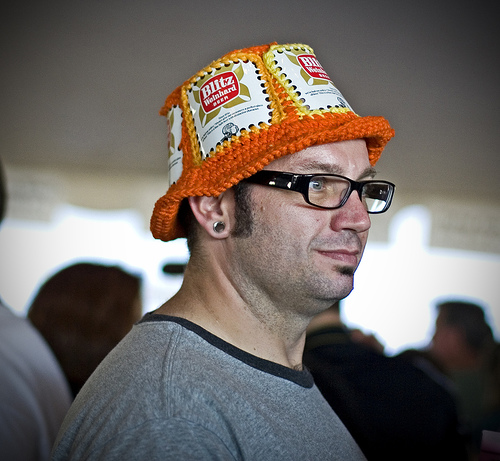

A man in an orange hat starring at something .
A man wears an orange hat and glasses .
A man with gauges and glasses is wearing a Blitz hat .
A man with glasses is wearing a beer can crocheted hat .
The man with pierced ears is wearing glasses and an orange hat .


In [0]:
temp = captions[20].split("#")
from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)

for ix in range(len(img_dict[temp[0]])):
    print(img_dict[temp[0]][ix])

In [0]:
from keras.preprocessing import image, sequence
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [0]:
train_data = {}
ctr=0
for ix in x_train:
    if ix == "":
        continue
    if ctr >= 3000:
        break
    ctr+=1
    if ctr%1000==0:
        print(ctr)
    path = images_path + ix
    img = preprocessing(path)
    pred = model.predict(img).reshape(2048)
    train_data[ix] = pred

1000
2000
3000


In [0]:
train_data['2513260012_03d33305cf.jpg'].shape

In [0]:
import pandas as pd

pd_dataset = pd.read_csv("flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values
print(ds.shape)

(30000, 2)


In [0]:
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

30000


In [0]:
sentences[:5]

['<start> A black dog is running after a white dog in the snow . <end>',
 '<start> Black dog chasing brown dog through snow <end>',
 '<start> Two dogs chase each other across the snowy ground . <end>',
 '<start> Two dogs play together in the snow . <end>',
 '<start> Two dogs running through a low lying body of water . <end>']

In [0]:
words = [i.split() for i in sentences]

In [0]:
unique = []
for i in words:
    unique.extend(i)
unique = list(set(unique))

print(len(unique))

vocab_size = len(unique)

8253


In [0]:
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [0]:
word_2_indices['UNK'] = 0
word_2_indices['raining'] = 8253

In [0]:
indices_2_word[0] = 'UNK'
indices_2_word[8253] = 'raining'

In [0]:
vocab_size = len(word_2_indices.keys())
print(vocab_size)

8254


In [0]:
max_len = 0

for i in sentences:
    i = i.split()
    if len(i) > max_len:
        max_len = len(i)

print(max_len)

40


In [0]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print(padded_sequences.shape)
print(subsequent_words.shape)

(30000,)
(30000,)


In [0]:
num_of_images = 2000

In [0]:
!ls /content/

 flickr_8k_test_dataset.txt    Flickr_Data	  model_weights.h5
 flickr_8k_train_dataset.txt   gdrive		  train_encoded_images.p
 flickr_8k_val_dataset.txt    'kaggle (1).json'
 flickr8k.zip		       kaggle.json


In [0]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

In [0]:
for ix in range(num_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("captions.npy", captions)
np.save("next_words.npy", next_words)

print(captions.shape)
print(next_words.shape)

(25493, 40)
(25493, 8254)


In [0]:
with open('/content/train_encoded_images.p', 'rb') as f:
    encoded_images = pickle.load(f, encoding="bytes")

In [0]:
imgs = []

for ix in range(ds.shape[0]):
    if ds[ix, 0].encode() in encoded_images.keys():
        imgs.append(list(encoded_images[ds[ix, 0].encode()]))

imgs = np.asarray(imgs)
print(imgs.shape)

(15000, 2048)


In [0]:
images = []
for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)
np.save("images.npy", images)
print(images.shape)

(25493, 2048)


In [0]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("image_names.npy", image_names)

print(len(image_names))


25493


In [0]:
captions = np.load("captions.npy")
next_words = np.load("next_words.npy")

print(captions.shape)
print(next_words.shape)

(25493, 40)
(25493, 8254)


In [0]:


images = np.load("images.npy")

print(images.shape)



(25493, 2048)


In [0]:
imag = np.load("image_names.npy")
        
print(imag.shape)

(25493,)


In [0]:
embedding_size = 128
max_len = 40

In [0]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

In [0]:
language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

In [0]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_input (InputLayer)    [(None, 40)]         0                                            
__________________________________________________________________________________________________
dense_input (InputLayer)        [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 128)      1056512     embedding_input[0][0]            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          262272      dense_input[0][0]                
____________________________________________________________________________________________

In [0]:
model.fit([images, captions], next_words, batch_size=512, epochs=200)

Epoch 1/200
50/50 [==============================] - 4s 80ms/step - loss: 5.1303 - accuracy: 0.2048
Epoch 2/200
50/50 [==============================] - 4s 79ms/step - loss: 4.0852 - accuracy: 0.2899
Epoch 3/200
50/50 [==============================] - 4s 79ms/step - loss: 3.7269 - accuracy: 0.3148
Epoch 4/200
50/50 [==============================] - 4s 80ms/step - loss: 3.4999 - accuracy: 0.3343
Epoch 5/200
50/50 [==============================] - 4s 79ms/step - loss: 3.3179 - accuracy: 0.3463
Epoch 6/200
50/50 [==============================] - 4s 79ms/step - loss: 3.1614 - accuracy: 0.3639
Epoch 7/200
50/50 [==============================] - 4s 79ms/step - loss: 3.0253 - accuracy: 0.3802
Epoch 8/200
50/50 [==============================] - 4s 79ms/step - loss: 2.8879 - accuracy: 0.3963
Epoch 9/200
50/50 [==============================] - 4s 80ms/step - loss: 2.7632 - accuracy: 0.4089
Epoch 10/200
50/50 [==============================] - 4s 80ms/step - loss: 2.6557 - accuracy: 0.4230

In [0]:
model.save_weights("/content/gdrive/My Drive/258-DeepLearning/Assignment-5/model_weights.h5")

In [0]:
resnet = tf.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [0]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [0]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = resnet.predict(image).reshape(2048)
    return pred

In [0]:
images_dir

'/content/gdrive/My Drive/258-DeepLearning/Data/flickr_data/Flickr_Data/'

In [0]:
img = images_dir+"Images/3726629271_7639634703.jpg"
test_img = get_encoding(model, img)

In [0]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

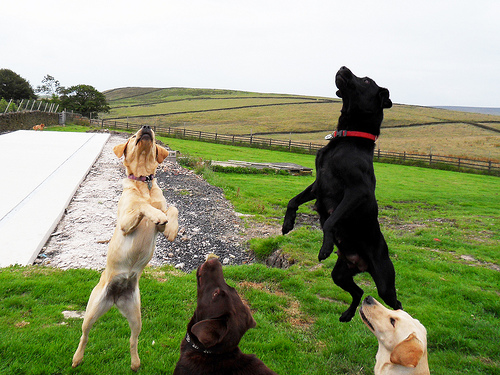

Two dogs are playing in the mud .


In [0]:
z = Image(filename=img)
display(z)

print(Argmax_Search)